In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [125]:
data = pd.read_csv("C:\\Users\\muham\\Downloads\\CarPrice_Assignment.csv")

In [126]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [12]:
data.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [13]:
data.shape

(205, 26)

In [10]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [20]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

C:\Users\muham\AppData\Local\Temp\ipykernel_8312\2089392726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["wheelbase"])


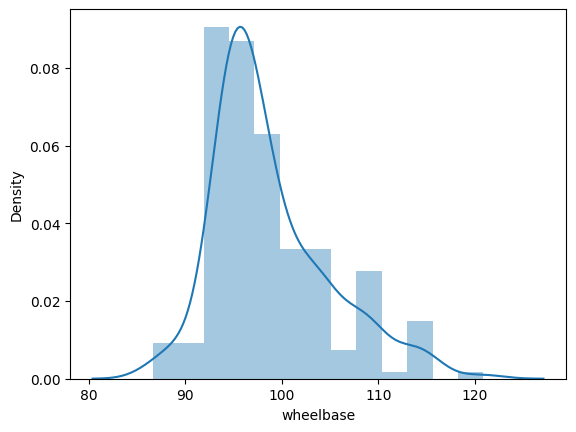

In [29]:
sns.distplot(data["wheelbase"])
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_8312\1249373407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["curbweight"])


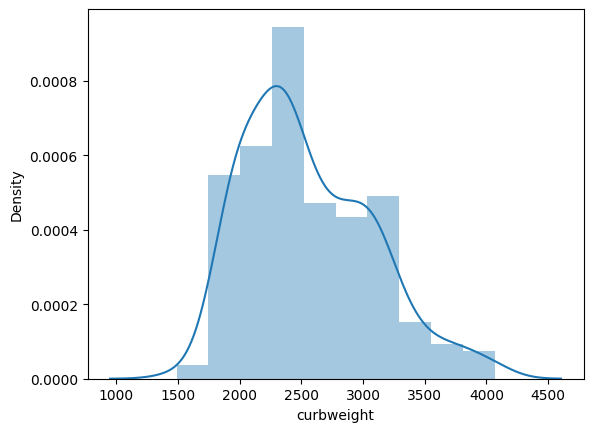

In [31]:
sns.distplot(data["curbweight"])
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_8312\2327454343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["stroke"])


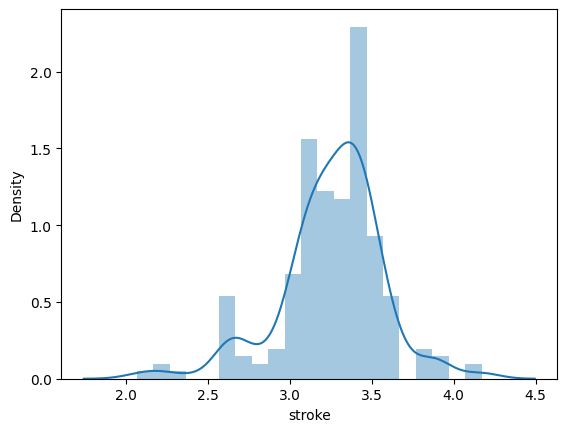

In [32]:
sns.distplot(data["stroke"])
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_8312\1828823329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["compressionratio"])


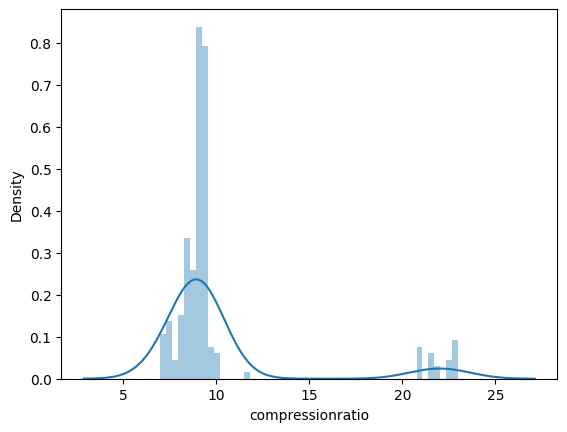

In [34]:
sns.distplot(data["compressionratio"])
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_8312\2253719339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"])


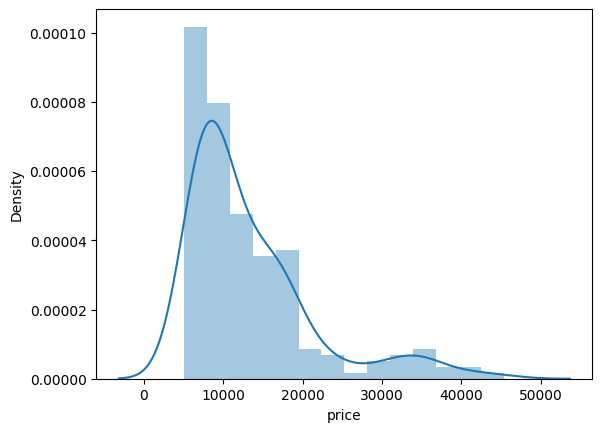

In [35]:
sns.distplot(data["price"])
plt.show()

In [38]:
#create a list to store all numerical variable

Cars_numeric = data.select_dtypes(include=["float64","int64"])
Cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
Cars_numeric.shape

(205, 16)

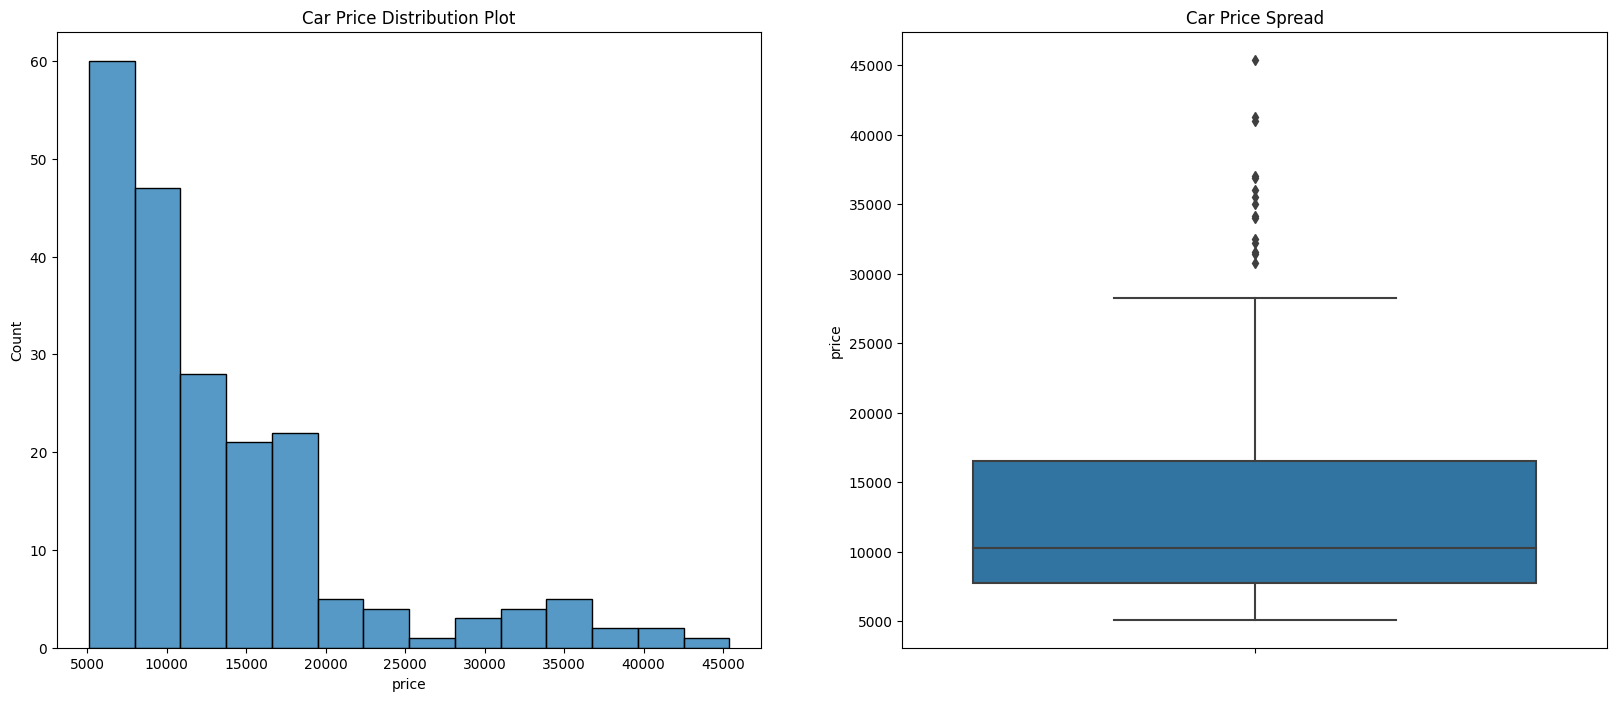

In [40]:
#getting information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.histplot(data["price"])


plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=data["price"])


plt.show()

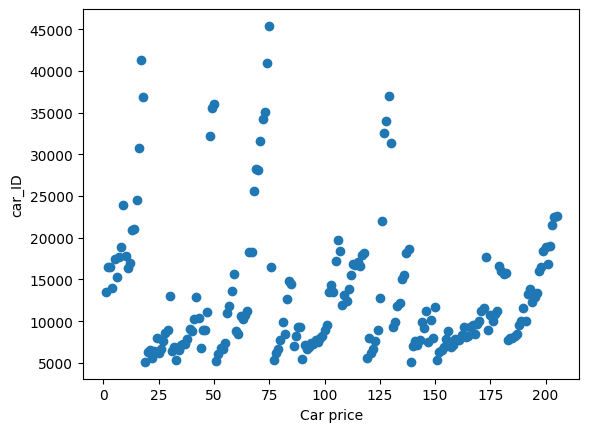

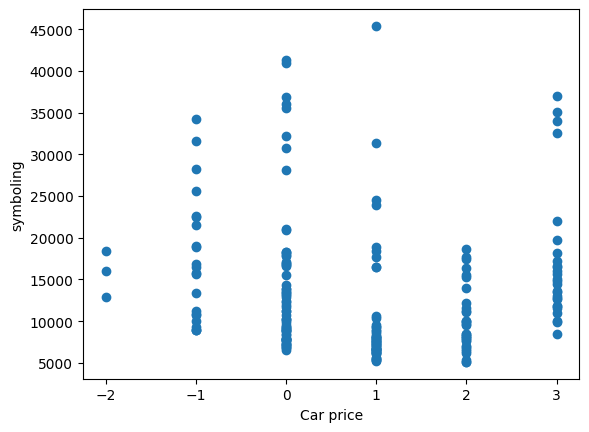

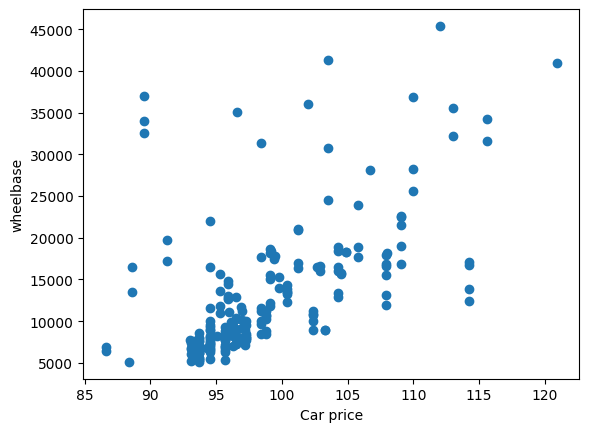

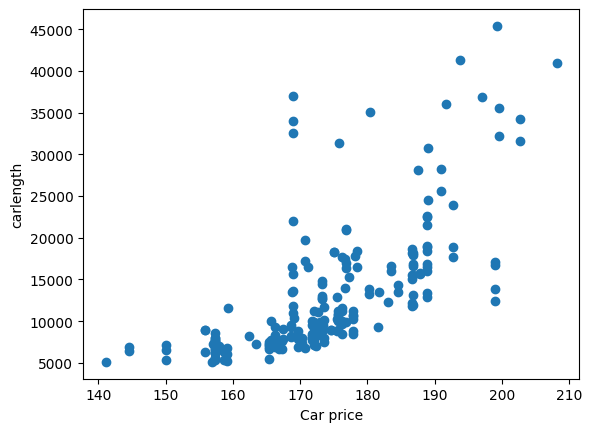

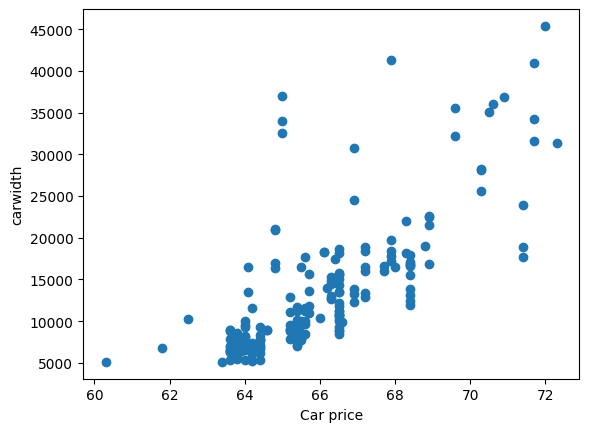

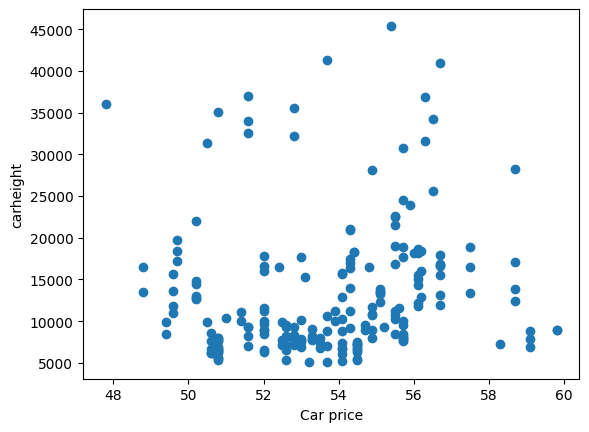

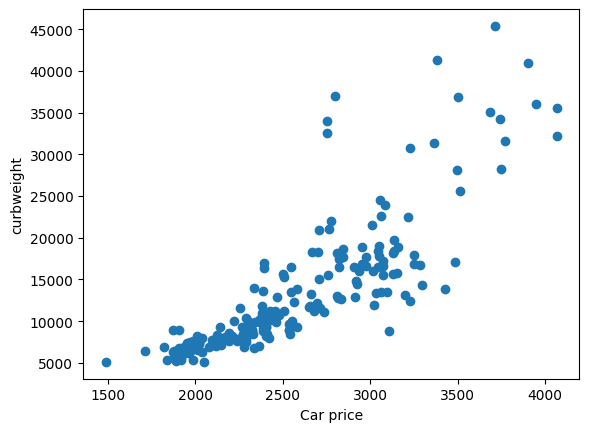

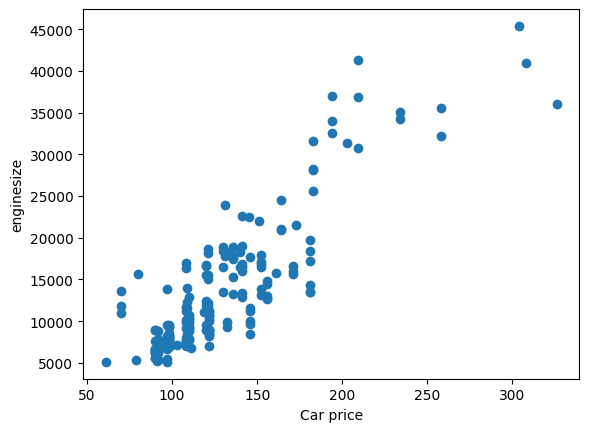

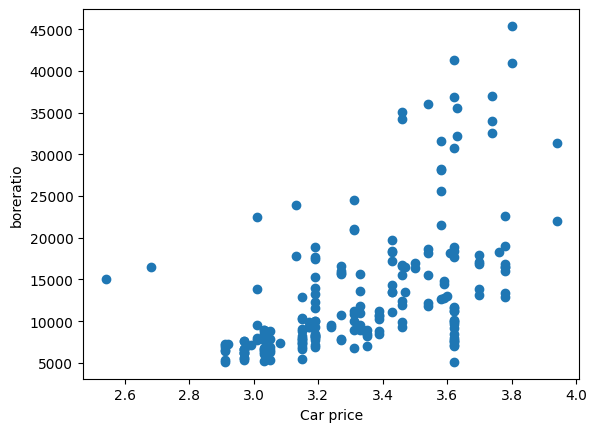

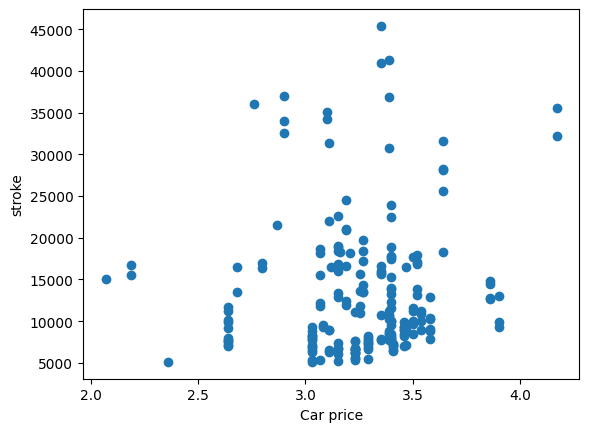

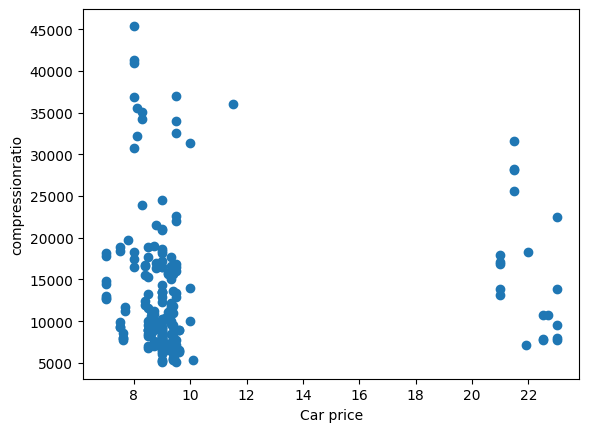

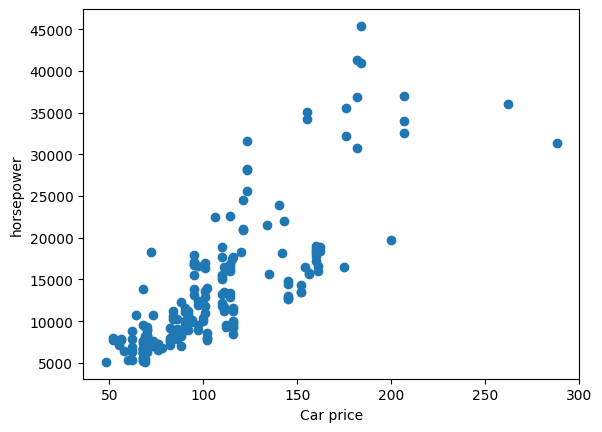

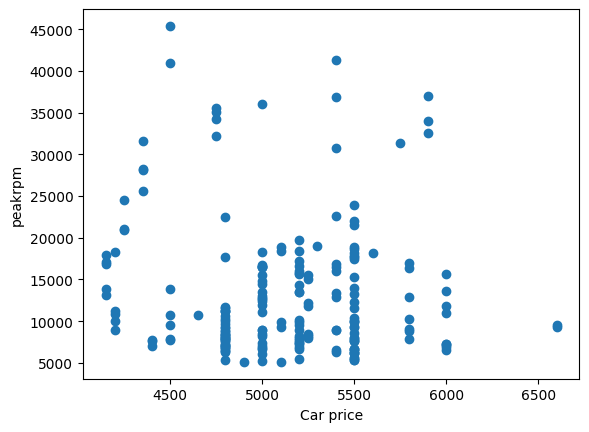

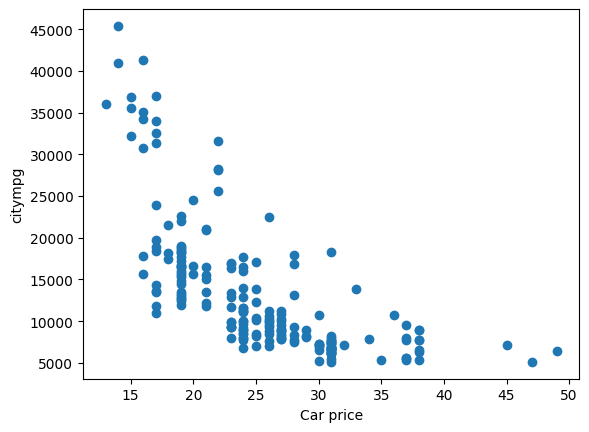

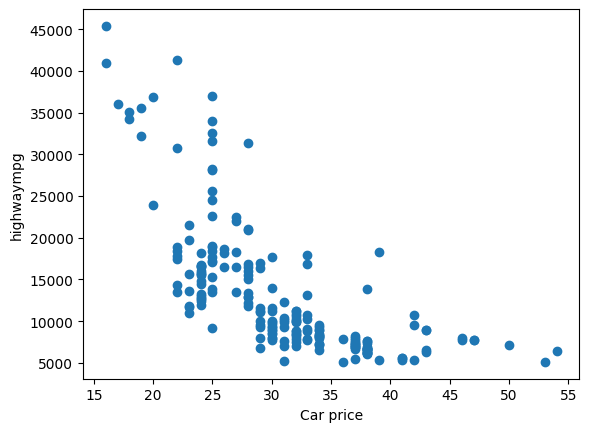

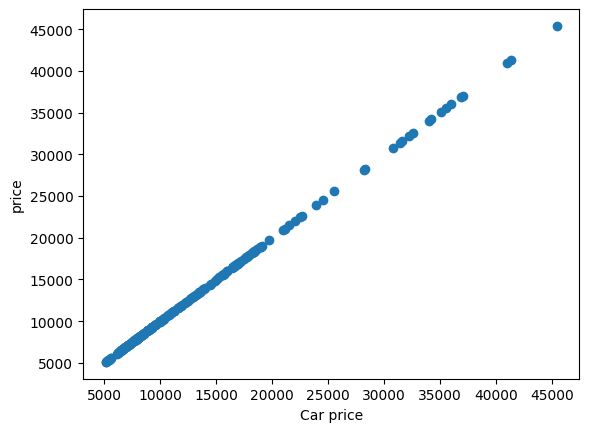

In [42]:
#Finding the relationship between independent and dependent variable

for feature in Cars_numeric:
    if feature not in ["Car_ID"]:
        plt.scatter(y=data["price"], x=data[feature])
        plt.xlabel("Car price")
        plt.ylabel(feature)
        plt.show()

In [43]:
correlation_matrix=Cars_numeric.corr()
correlation_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


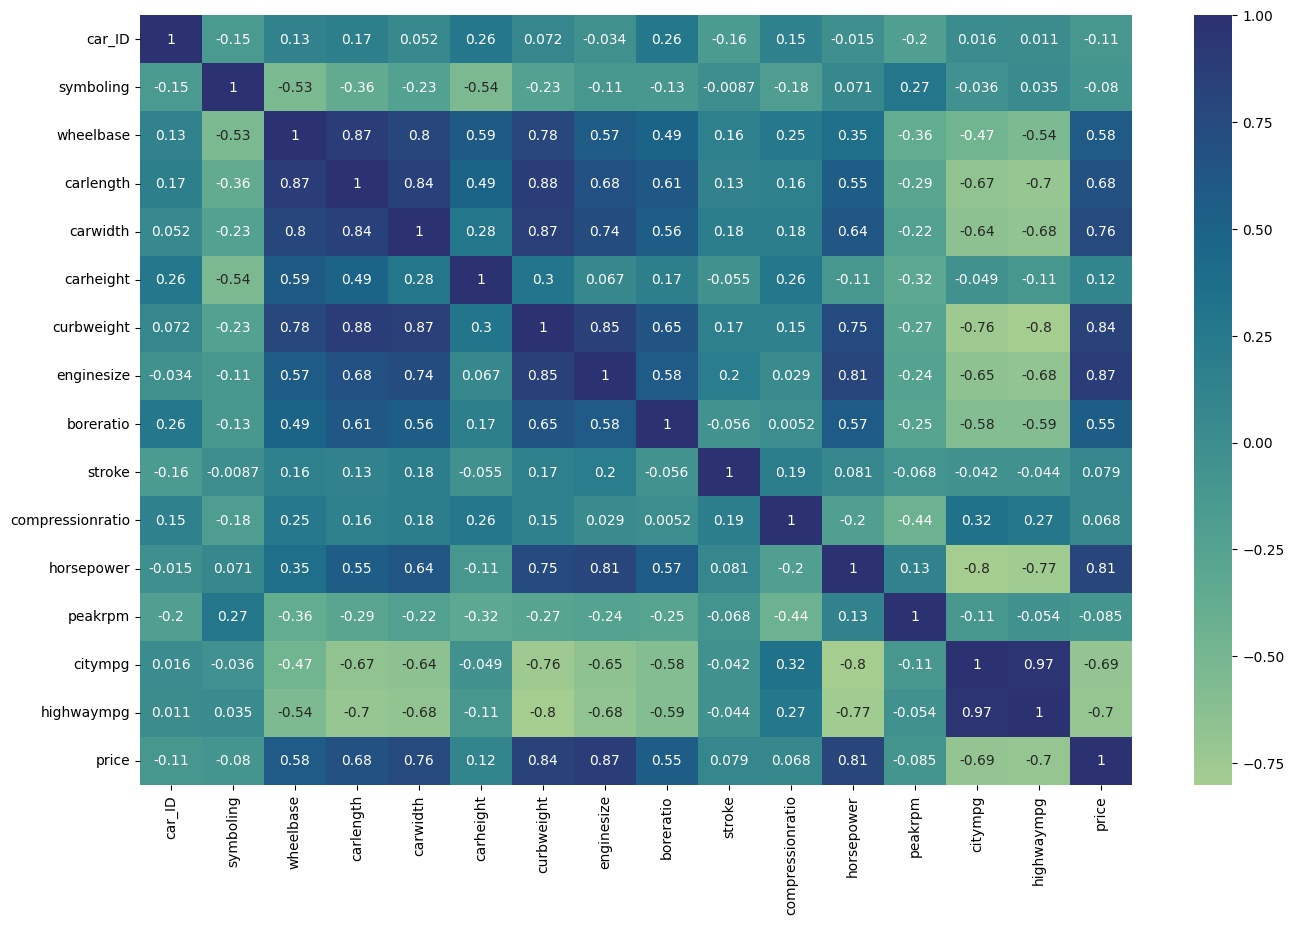

In [44]:
# Heatmap

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,cmap="crest", annot=True)
plt.show()

<Figure size 3000x1000 with 0 Axes>

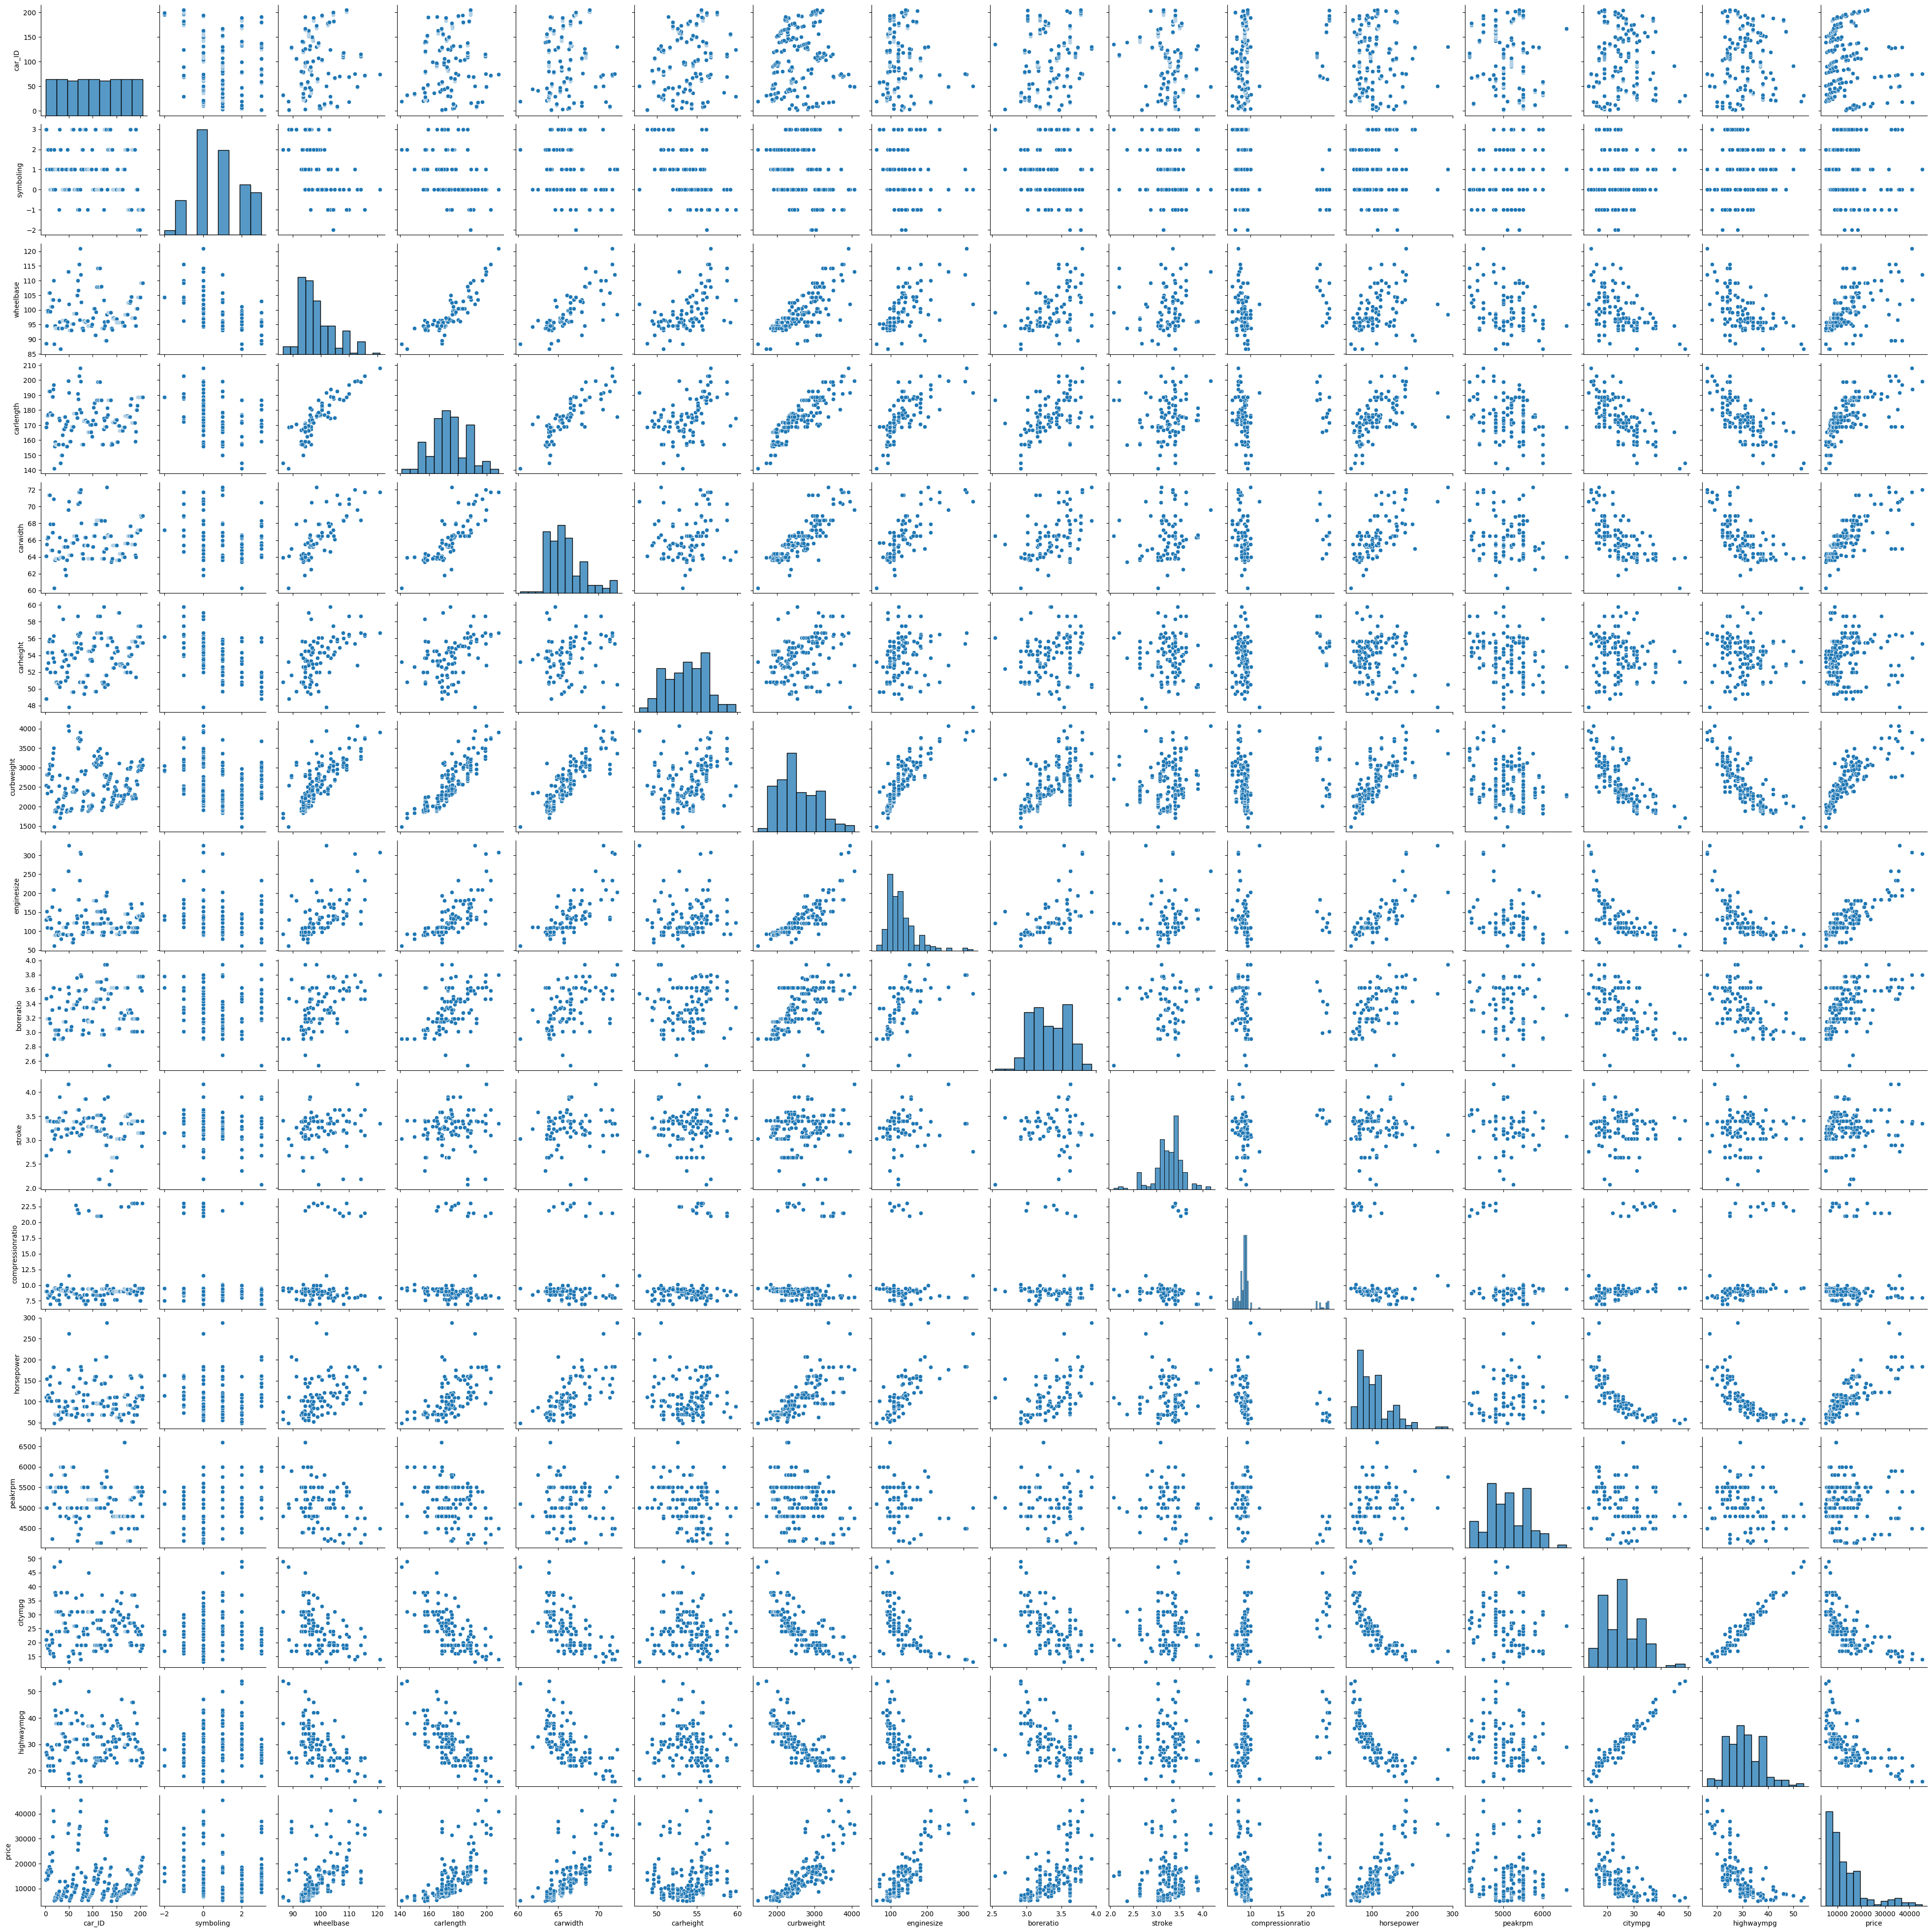

In [66]:
plt.figure(figsize=(30, 10))
sns.pairplot(Cars_numeric)
plt.show()

In [68]:
#creating a list to store all categorical variable
#creating a list to store all numerical variable
Cars_categorical=data.select_dtypes(include=["object","category"])
Cars_categorical.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [69]:
Cars_categorical.shape

(205, 10)

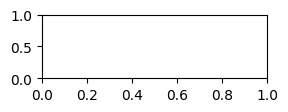

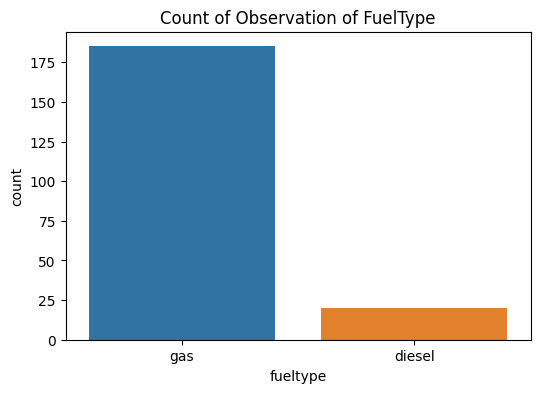

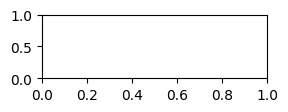

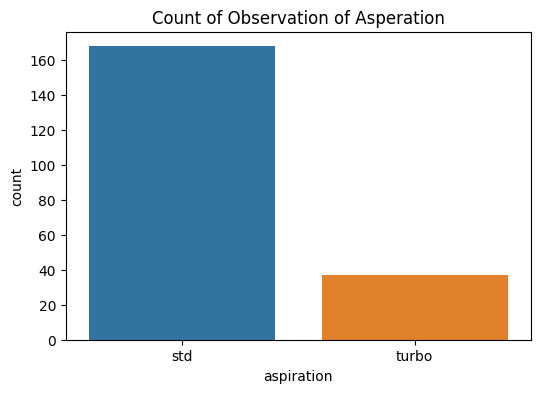

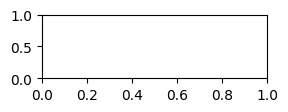

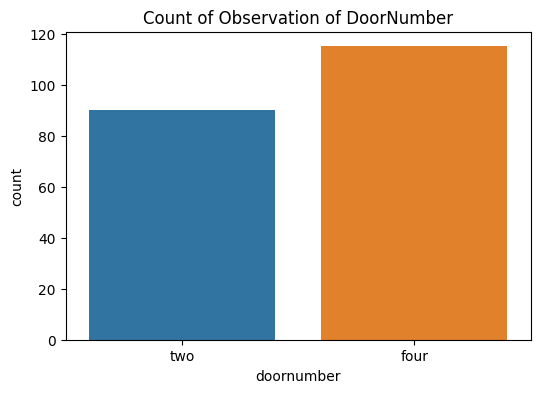

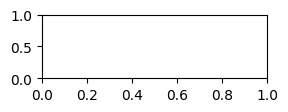

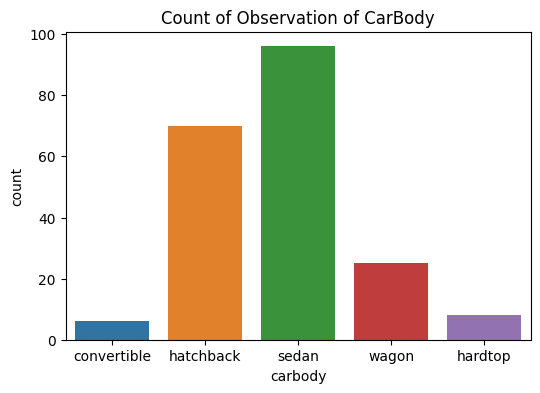

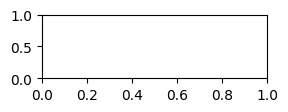

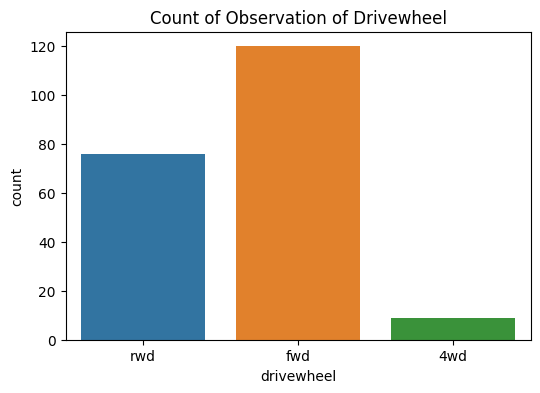

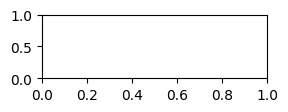

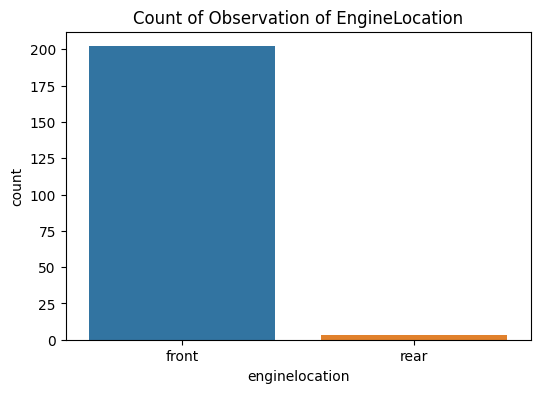

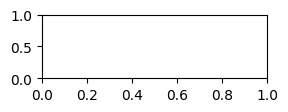

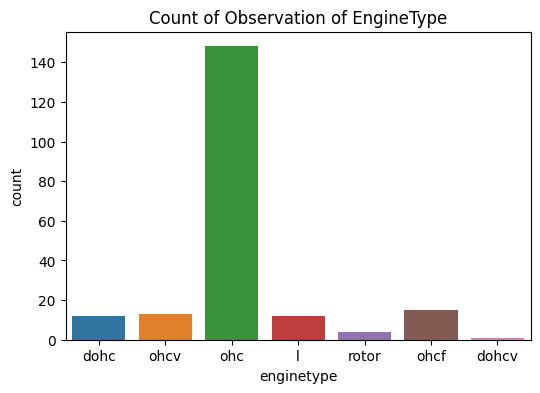

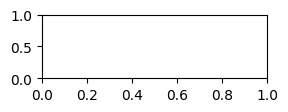

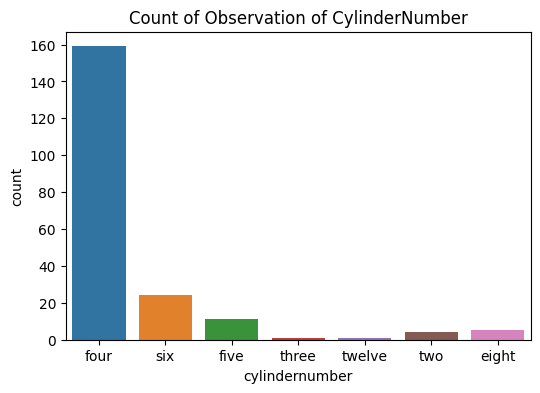

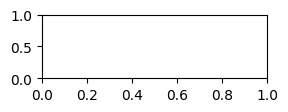

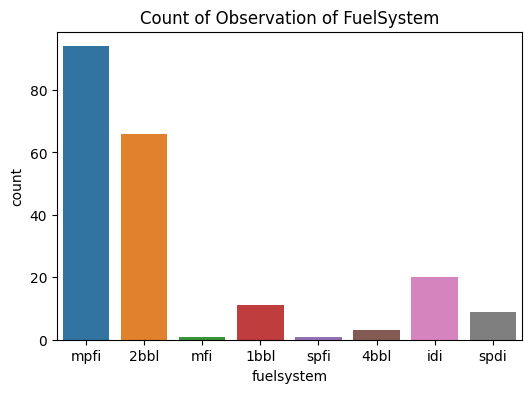

In [70]:
plt.subplot(5,2,1) 
plt.figure(figsize = (6,4))
sns.countplot(x= data["fueltype"],data = data)
plt.title("Count of Observation of FuelType") 
plt.show()

plt.subplot(5,2,2)
plt.figure(figsize = (6,4)) 
sns.countplot(x=data["aspiration"] ,data=data)
plt.title("Count of Observation of Asperation") 
plt.show() 

plt.subplot(5,2,3) 
plt.figure(figsize =(6,4))
sns.countplot(x=data["doornumber"] ,data=data) 
plt.title("Count of Observation of DoorNumber") 
plt.show() 

plt.subplot(5,2,4)
plt.figure(figsize = (6,4))
sns.countplot(x=data["carbody"] ,data=data)
plt.title("Count of Observation of CarBody")
plt.show() 

plt.subplot(5,2,5) 
plt.figure(figsize =(6,4))
sns.countplot(x=data["drivewheel"] ,data=data)
plt.title("Count of Observation of Drivewheel")
plt.show() 

plt.subplot(5,2,6)
plt.figure(figsize = (6,4))
sns.countplot(x=data["enginelocation"] ,data=data) 
plt.title("Count of Observation of EngineLocation")
plt.show() 

plt.subplot(5,2,7)
plt.figure(figsize =(6,4)) 
sns.countplot(x=data["enginetype"] ,data=data) 
plt.title("Count of Observation of EngineType") 
plt.show()

plt.subplot(5,2,8) 
plt.figure(figsize = (6,4)) 
sns.countplot(x=data["cylindernumber"] ,data=data) 
plt.title("Count of Observation of CylinderNumber")
plt.show()

plt.subplot(5,2,9) 
plt.figure(figsize = (6,4)) 
sns.countplot(x=data["fuelsystem"] ,data=data)
plt.title("Count of Observation of FuelSystem")
plt.show()

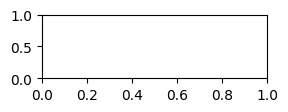

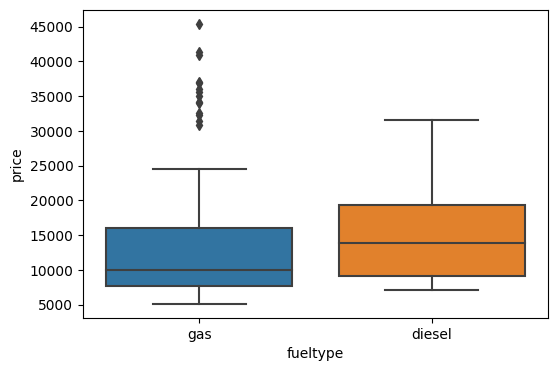

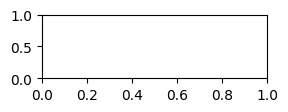

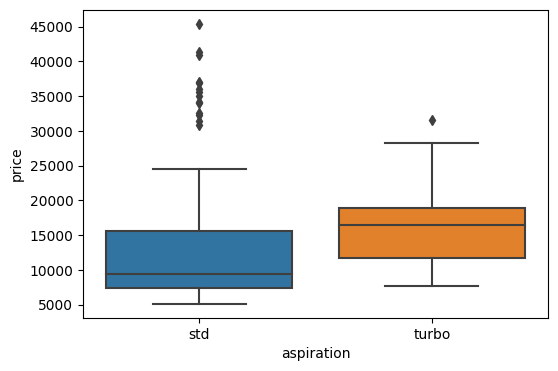

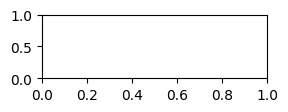

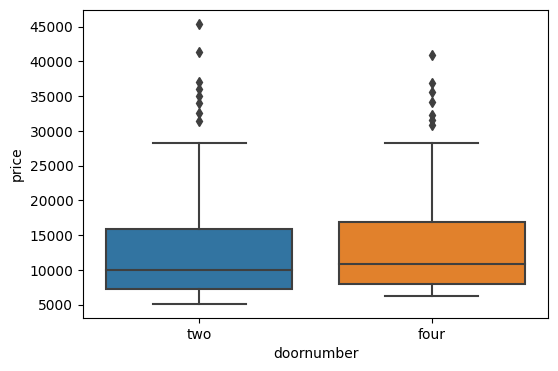

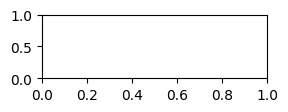

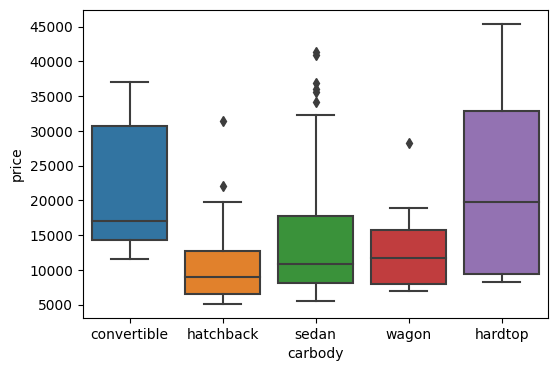

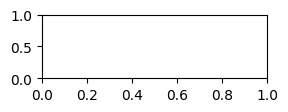

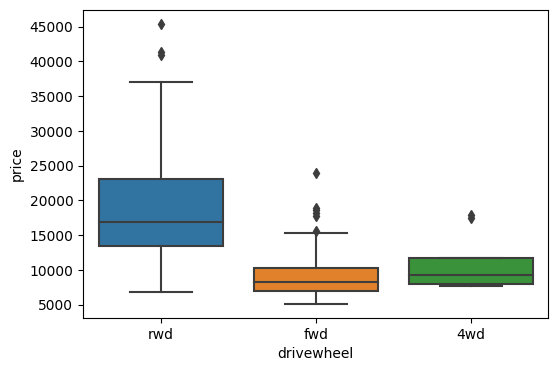

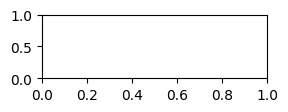

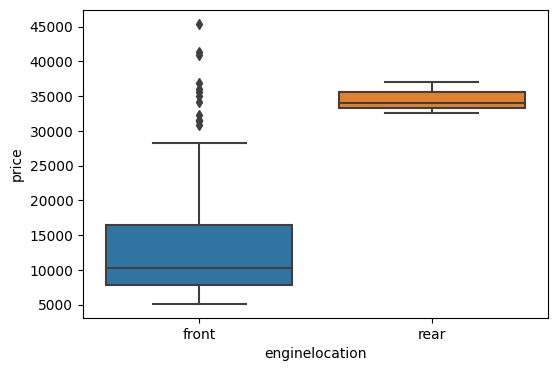

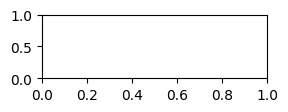

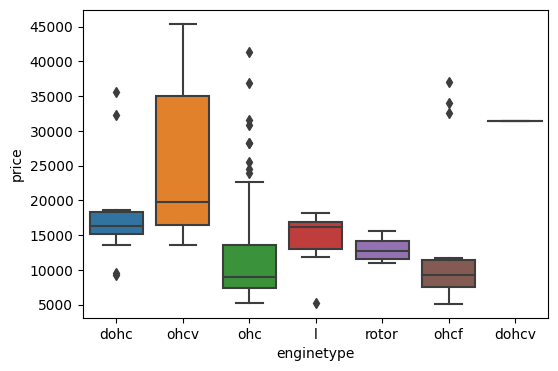

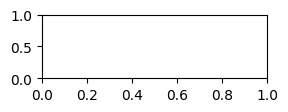

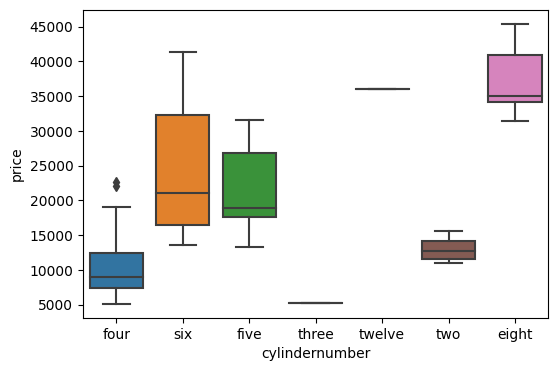

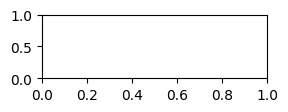

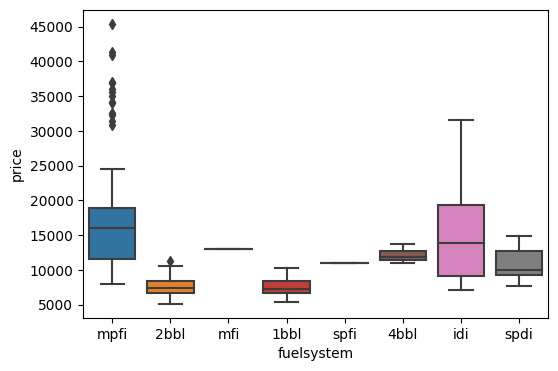

In [71]:
plt.subplot(5,2,1) 
plt.figure(figsize = (6,4)) 
sns.boxplot(x= data["fueltype"],y=data["price"])
plt.show()

plt.subplot(5,2,2) 
plt.figure(figsize = (6,4)) 
sns.boxplot(x=data["aspiration"] ,y=data["price"]) 
plt.show() 

plt.subplot(5,2,3) 
plt.figure(figsize =(6,4))
sns.boxplot(x=data["doornumber"] ,y=data["price"])
plt.show() 

plt.subplot(5,2,4)
plt.figure(figsize = (6,4)) 
sns.boxplot(x=data["carbody"] ,y=data["price"])
plt.show()


plt.subplot(5,2,5)
plt.figure(figsize =(6,4)) 
sns.boxplot(x=data["drivewheel"] ,y=data["price"])
plt.show()

plt.subplot(5,2,6)
plt.figure(figsize = (6,4))
sns.boxplot(x=data["enginelocation"] ,y=data["price"]) 
plt.show() 

plt.subplot(5,2,7) 
plt.figure(figsize =(6,4))
sns.boxplot(x=data["enginetype"] ,y=data["price"]) 
plt.show()

plt.subplot(5,2,8)
plt.figure(figsize = (6,4)) 
sns.boxplot(x=data["cylindernumber"] ,y=data["price"]) 
plt.show()

plt.subplot(5,2,9) 
plt.figure(figsize = (6,4)) 
sns.boxplot(x=data["fuelsystem"] ,y=data["price"])
plt.show()

In [73]:
Cars_categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [75]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [76]:
print(data["CarName"].value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


In [77]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)

In [78]:
data.drop(['CarName'],axis=1, inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
data["CompanyName"].value_counts()

CompanyName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [81]:
# FIXING INVALID VALUES

data["CompanyName"] = data["CompanyName"].str.lower()

def replace_name(a,b): 
    data["CompanyName"].replace(a,b,inplace=True) 
    
replace_name('maxda','mazda') 
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen') 
replace_name('vw','volkswagen')

data["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [82]:
#checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


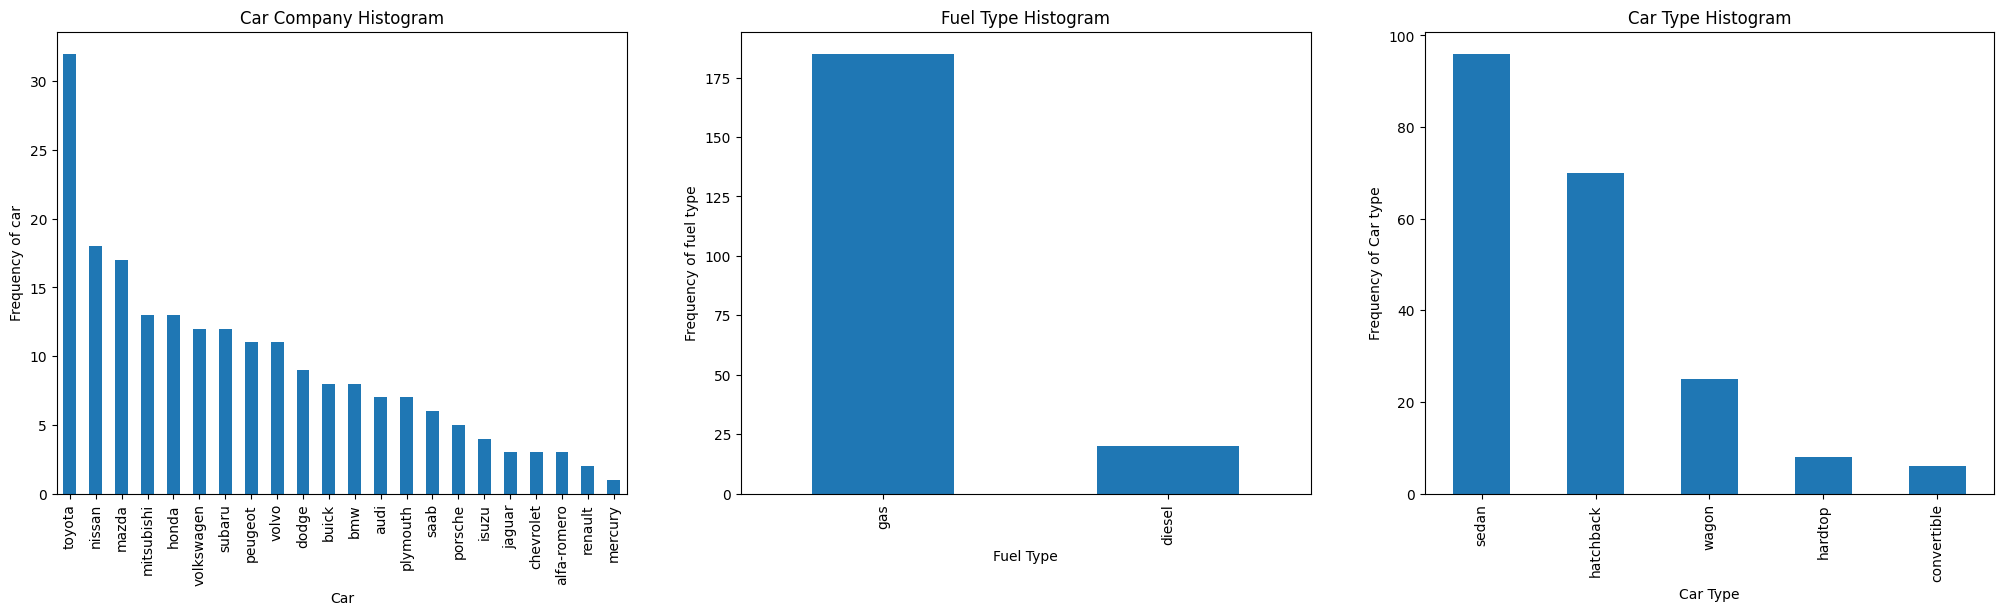

In [83]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data["CompanyName"].value_counts().plot(kind = 'bar') 
plt.title('Car Company Histogram') 
plt1.set(xlabel = 'Car', ylabel='Frequency of car')

plt.subplot(1,3,2)
plt1 = data["fueltype"].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3) 
plt1 = data["carbody"].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram') 
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type') 

plt.show()

In [84]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
data.shape

(205, 26)

In [87]:
#Drop the Car_ID from Dataset because its just giving index number

Cars=data.drop(['car_ID'], axis = 1)

In [88]:
#checking shape again

Cars.shape

(205, 25)

In [91]:
#Checking different levels of cylinder numbers
data["cylindernumber"].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [92]:
#Checking different levels of cylinder numbers

data["doornumber"].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [96]:
# Encoding ordinal categorical columns
Cars['doornumber']= Cars['doornumber'].map({'two': 2, 'four': 4})
Cars['cylindernumber'] = Cars['cylindernumber'].map({'two': 2, 'four': 4})

In [97]:
# ENCONDING

# First we subset all categorical variables and store in a variable.

Car_Categorical = data.select_dtypes("object")
Car_Categorical.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [99]:
#Convert them to dummies and dropping the first dummy

Car_dummies = pd.get_dummies(Car_Categorical, drop_first = True)
Car_dummies

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [108]:
# Dropping Car_Categorical columns from original dataset
Cars = data.drop(list(Car_Categorical.columns), axis=1)

In [109]:
Cars.shape

(205, 16)

In [112]:
# Now we will concat dummies columns to original data set
Cars=pd.concat([Cars,Car_dummies],axis=1)
Cars.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [113]:
df_train,df_test = train_test_split(Cars,train_size=0.7,random_state=100)

In [114]:
print(df_train.shape)
print(df_test.shape)

(143, 66)
(62, 66)


In [115]:
# SCALING

Cars_numeric.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [116]:
#Importing MinMaxscaler for rescaling
from sklearn.preprocessing import StandardScaler
#Scaling the numerical Data
Scaler=StandardScaler()

In [118]:
# Creating a list of variable that we need scale 
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 
           'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

#Appling scaler() to num_vars 
df_train[varlist] = Scaler.fit_transform(df_train[varlist])

In [119]:
#Looking at train dataset
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.170159,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,...,False,False,False,True,False,False,False,False,False,False
125,126,1.848278,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,...,False,False,False,False,False,False,False,True,False,False
166,167,0.170159,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,...,False,False,False,False,False,False,False,True,False,False
1,2,1.848278,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,...,False,False,False,False,False,False,False,True,False,False
199,200,-1.507960,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,...,False,False,False,False,False,False,False,True,False,False


In [120]:
#Creating X and Y
y_train = df_train.pop('price')
x_train = df_train

In [121]:
x_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.170159,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,...,False,False,False,True,False,False,False,False,False,False
125,126,1.848278,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,...,False,False,False,False,False,False,False,True,False,False
166,167,0.170159,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,...,False,False,False,False,False,False,False,True,False,False
1,2,1.848278,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,...,False,False,False,False,False,False,False,True,False,False
199,200,-1.507960,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,...,False,False,False,False,False,False,False,True,False,False


In [122]:
y_train.head()

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
Name: price, dtype: float64

In [123]:
x_train.shape,y_train.shape

((143, 65), (143,))

In [128]:
# RFE and LinearRegression

y_test = df_test.pop('price')
x_test = df_test

In [ ]:
# Adding constant variable to test dataframe

x_test_new = sm.add_constant(x_test)

In [135]:
# LINEAR REGRESSION

model_LR= LinearRegression()
model_LR.fit(x_train, y_train)
Y_pred = model_LR.predict(x_test)

In [136]:
mse=mean_squared_error(y_test, Y_pred)
mse

207093156.79776987

In [138]:
model_LR.score(x_test, y_test)

-1.957244449725831